Epoch 100/500, Loss: 0.0272
Epoch 200/500, Loss: 0.0260
Epoch 300/500, Loss: 0.0238
Epoch 400/500, Loss: 0.0237
Epoch 500/500, Loss: 0.0196



Enter a character (A-Z) to recognize, or 'q' to quit:  m


User input character: M
Model prediction on input character image: E


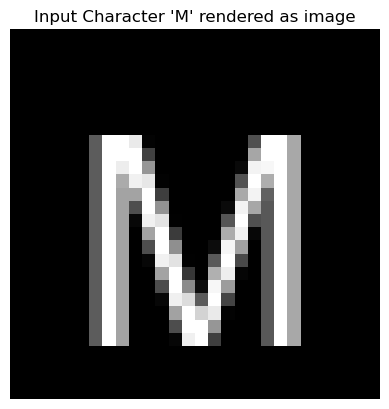


Enter a character (A-Z) to recognize, or 'q' to quit:  e


User input character: E
Model prediction on input character image: E


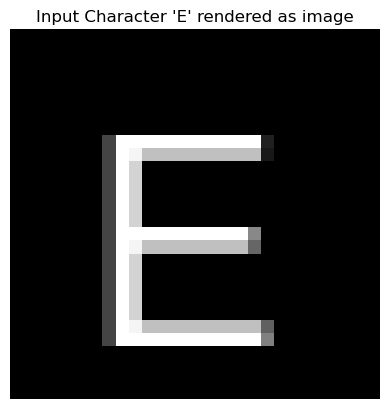


Enter a character (A-Z) to recognize, or 'q' to quit:  i


User input character: I
Model prediction on input character image: T


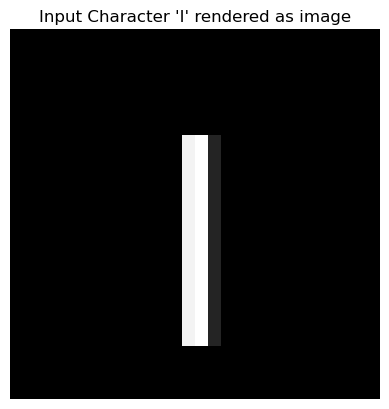


Enter a character (A-Z) to recognize, or 'q' to quit:  y


User input character: Y
Model prediction on input character image: Y


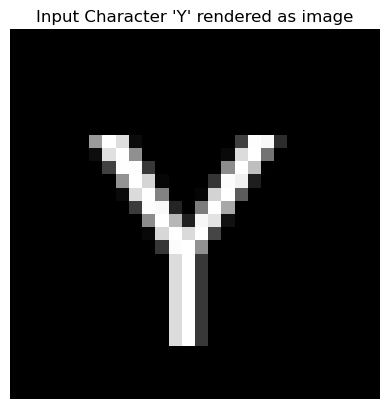


Enter a character (A-Z) to recognize, or 'q' to quit:  a


User input character: A
Model prediction on input character image: K


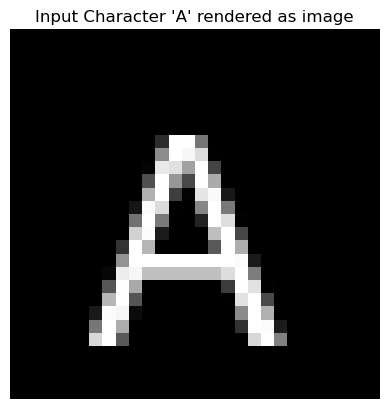


Enter a character (A-Z) to recognize, or 'q' to quit:  r


User input character: R
Model prediction on input character image: N


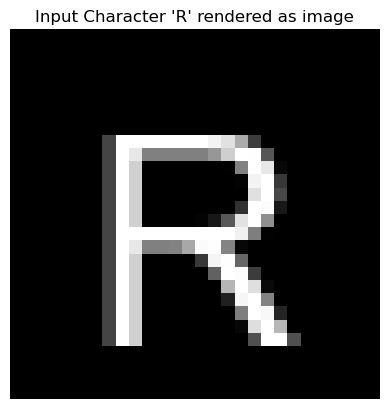


Enter a character (A-Z) to recognize, or 'q' to quit:  a


User input character: A
Model prediction on input character image: K


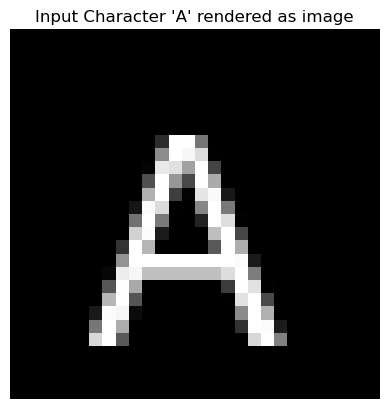


Enter a character (A-Z) to recognize, or 'q' to quit:  s


User input character: S
Model prediction on input character image: S


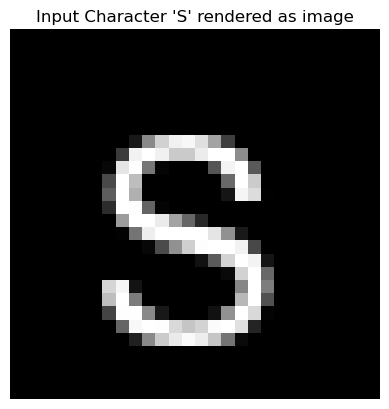


Enter a character (A-Z) to recognize, or 'q' to quit:  i


User input character: I
Model prediction on input character image: T


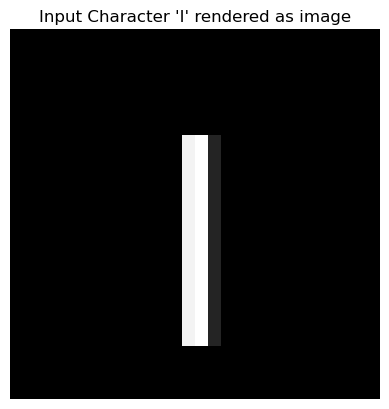


Enter a character (A-Z) to recognize, or 'q' to quit:  meiyarasi


Invalid input. Please enter a single letter A-Z.


In [ ]:
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x):
    return x * (1 - x)

# Convert character to 28x28 image vector
def char_to_image_vector(char):
    img = Image.new('L', (28, 28), color=255)
    draw = ImageDraw.Draw(img)
    try:
        font = ImageFont.truetype("arial.ttf", 22)
    except IOError:
        font = ImageFont.load_default()
    bbox = draw.textbbox((0, 0), char, font=font)
    w = bbox[2] - bbox[0]
    h = bbox[3] - bbox[1]
    position = ((28 - w) // 2, (28 - h) // 2 - 2)
    draw.text(position, char, fill=0, font=font)
    arr = np.array(img).astype(np.float32)
    arr = 255 - arr
    arr /= 255.0
    return arr.flatten()

# Generate training data from A–Z
X = []
y = []
for i in range(26):
    char = chr(65 + i)
    vec = char_to_image_vector(char)
    X.append(vec)
    one_hot = np.zeros(26)
    one_hot[i] = 1
    y.append(one_hot)

X = np.array(X)
y = np.array(y)

# Network architecture
input_size = 784
hidden_size = 128
output_size = 26

np.random.seed(42)
W1 = np.random.uniform(-0.5, 0.5, (input_size, hidden_size))
W2 = np.random.uniform(-0.5, 0.5, (hidden_size, output_size))

learning_rate = 0.1
epochs = 500

# Train network
for epoch in range(epochs):
    hidden_layer = sigmoid(np.dot(X, W1))
    output_layer = sigmoid(np.dot(hidden_layer, W2))

    error = y - output_layer
    loss = np.mean(error ** 2)

    d_output = error * sigmoid_derivative(output_layer)
    d_hidden = d_output.dot(W2.T) * sigmoid_derivative(hidden_layer)

    W2 += hidden_layer.T.dot(d_output) * learning_rate
    W1 += X.T.dot(d_hidden) * learning_rate

    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}")

# Prediction function
def predict_letter(sample):
    hidden = sigmoid(np.dot(sample, W1))
    output = sigmoid(np.dot(hidden, W2))
    pred_class = np.argmax(output)
    return pred_class, chr(pred_class + 65)

# Interactive loop
while True:
    user_char = input("\nEnter a character (A-Z) to recognize, or 'q' to quit: ").upper()
    if user_char == 'Q':
        break
    if len(user_char) != 1 or not ('A' <= user_char <= 'Z'):
        print("Invalid input. Please enter a single letter A-Z.")
        continue

    img_vector = char_to_image_vector(user_char)
    pred_class, pred_letter = predict_letter(img_vector)

    print(f"User input character: {user_char}")
    print(f"Model prediction on input character image: {pred_letter}")

    plt.imshow(img_vector.reshape(28, 28), cmap='gray')
    plt.title(f"Input Character '{user_char}' rendered as image")
    plt.axis('off')
    plt.show()
